# DT2119 Speech and Speaker Recognition, Giampiero Salvi
## Effect of hamming window
### Licence: CC-BY-NC-SA: Attribution Noncommercial Share Alike
We will test the effect of using the hamming window on a sinusoidal signal of a certain frequency. You can vary the window lenght in time, the frequency of the signal, and the lenght of the FFT to check the effect of those parameters

In [111]:
# Import required libraries
import numpy as np
from scipy.fftpack import fft
from scipy.signal import hamming
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
# define parameters
samplingrate = 20000.0
tonefreq = 2000.0                               # way below the Nyquist frequency
winlen = 400                                    # lenght in samples (seconds=winlen/samplingrate)
fftlen = 2**10
t = np.arange(winlen)/samplingrate              # time axis
f = np.arange(fftlen/2)*samplingrate/fftlen     # frequency axis (up to Nyquist frequency)

In [113]:
# generate signals
sig = np.sin(2*np.pi*tonefreq*t)
hamwin = hamming(winlen)
hamsig = sig * hamwin

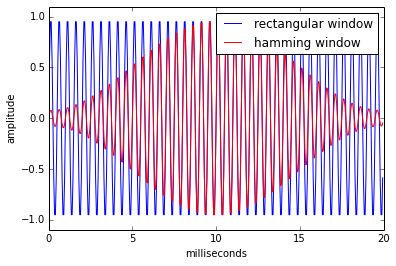

In [114]:
# plot signals in time domain
plt.plot(t*1000, sig, label='rectangular window')
plt.plot(t*1000, hamsig, 'r', label='hamming window')
plt.ylim([-1.1, 1.1])
plt.legend()
plt.xlabel('milliseconds')
plt.ylabel('amplitude')
plt.show()

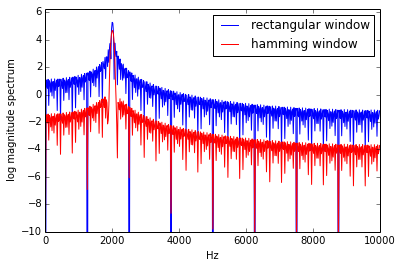

In [115]:
# go to frequency domain
reclogfft = np.log(np.abs(fft(sig, n=fftlen)))
hamlogfft = np.log(np.abs(fft(hamsig, n=fftlen)))
plt.plot(f, reclogfft[0:fftlen//2], label='rectangular window')
plt.plot(f, hamlogfft[0:fftlen//2], 'r', label='hamming window')
plt.xlabel('frequency (Hz)')
plt.ylabel('log magnitude spectrum')
plt.ylim([-10, np.max(reclogfft)+1])
plt.legend()
plt.show()

In [1]:
# zoom in
plt.plot(f, reclogfft[0:fftlen//2], label='rectangular window')
plt.plot(f, hamlogfft[0:fftlen//2], 'r', label='hamming window')
plt.xlabel('frequency (Hz)')
plt.ylabel('log magnitude spectrum')
plt.ylim([-3, np.max(reclogfft)+1])
binsinlobe = samplingrate/fftlen*10
plt.xlim(np.int(tonefreq)+np.array([-1, 1])*binsinlobe)
plt.show()


NameError: name 'plt' is not defined

## Discussion
Because we are dealing with a finite portion of the signal (instead of a sinusoid from -inf to +inf) we only have <b>limited resolution in frequency</b>. This is the signal processing version of the Heisenberg's uncertainty principle: trade-off between time and frequency resolution. Because of this, the FFT will not only show the energy of the signal at the frequency of the sinusoid, but it will show a primary "lobe" at that frequency and a number of secondary lobes, depending on the lenght of the window. The primary lobe for the hamming window is slighlty wider than for the rectangular window. However the side lobes are much lower. This means that if we have several tones at different frequencies, they will interfere less with one another.

## Extra exercises:
<ul>
<li>Uncertainty principle: change the window and the fft lengths and see how the lobes change in width.</li>
<li>Inteference: define two sinusoids at different frequencies f1 and f2 and compare the value of the FFT at f1 and f2 for the single signals and for the combination of signals. How does this vary with the distance between f1 and f2?</li>
<li>Window shapes: test with different window definitions: hamming, hanning, cosine... You find the complete list of available windows in the documentation of <tt>scipy.signal</tt></li>
</ul>